In [1]:
from sage.all import *
from contextlib import redirect_stdout

In [2]:
# Deletion on e
def left_operation(F, e):
    F.delete_edge(e)
    return F

# Contraction on e plus singleton
def middle_operation(F, e):
    F.contract_edge(e)
    F.add_vertex()
    return F

# Contraction on e plus singleton and edge
def right_operation(F, e):
    F.contract_edge(e)
    F.add_vertex()
    F.add_edge(e)
    return F

# If tree has an internal edge, it returns one; otherwise, returns None
def get_internal_edge(F):
    for e in F.edges(labels=False):
        if F.degree(e)[0] > 1 and F.degree(e)[1] > 1:
            return e
    return None

# Input: array p
# Output: returns the number of 1's in p
def num_singletons(p):
    num = 0
    for i in p:
        if i == 1:
            num += 1
    return num

# Input: an integer partition p, the set of partitions of n
# Output: returns the index of p in Partitions(n), assuming lexicographic ordering and zero-indexing
def get_index(p, partitions):
    i = 0
    for partition in partitions:
        if partition == p:
            return i
        else:
            i += 1

# Input: an arbitrary tree T
# Output: number of internal edges in T
def num_int_edges(T):
    T = T.copy()
    i=0
    e = get_internal_edge(T)
    while (e != None):
        i += 1
        T = middle_operation(T, e)
        e = get_internal_edge(T)
    return i

In [8]:
# # Sage matrix implementation to construct CSF matrices

# # Input: A forest F on n>=2 vertices, a list of forests seen so far
# # Output: Returns the CSF of F as a vector of length p(n), in lexicographic order
# def CSF_helper(F,n,seen_list):
#     partitions = Partitions(n)
#     # Base case: F has already been seen
#     for seen_forest in seen_list:
#         if seen_forest.is_isomorphic(F):
#             return seen_list[seen_forest]

#     CSF = zero_vector(ZZ, len(partitions))

#     # Base case: F has no internal edges
#     e = get_internal_edge(F)
#     if e == None:
#         p = F.connected_components_sizes()
#         sign = (-1)**num_singletons(p)
#         index = get_index(p,partitions)
#         CSF[index] = sign
#         seen_list[F.copy(immutable=True)] = CSF
#         return CSF

#     # Recursive case: F has not been seen and has an internal edge
#     else: 
#         F1 = F.copy()
#         F2 = F.copy()
#         F3 = F.copy()
#         CSF = CSF_helper(left_operation(F1,e),n,seen_list) + CSF_helper(middle_operation(F2,e),n,seen_list) + CSF_helper(right_operation(F3,e),n,seen_list)
#         seen_list[F.copy(immutable=True)] = CSF
#         return CSF

# # Input: n>=0
# # Output: prints the CSF of all trees on n vertices
# def CSF(n):
#     CSF_matrix = Matrix(0,len(Partitions(n)))
#     seen_list = {}
#     tree_iterator = graphs.trees(n)
#     for tree in tree_iterator:
#         tree = tree.copy()
#         CSF_matrix = CSF_matrix.insert_row(0, CSF_helper(tree, n, seen_list))
#     return CSF_matrix

# #print(CSF(10))
# print(kernel(CSF(8)))

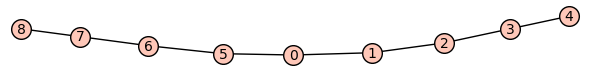

1
(1, -6, 2, 15, 2, -10, -20, 2, -10, 3, 20, 15, -5, 6, 20, -12, -20, -6, 1, -12, -10, 4, 18, 10, 1, -3, -4, -1, 0, 0)


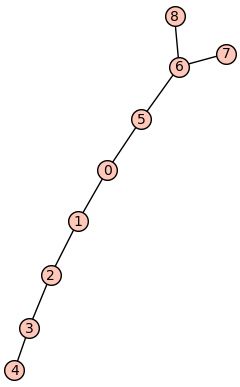

2
(1, -5, 1, 10, 2, -4, -10, 2, -8, 1, 6, 5, -4, 4, 12, -3, -4, -1, 1, -6, -4, 1, 3, 1, 0, 0, 0, 0, 0, 0)


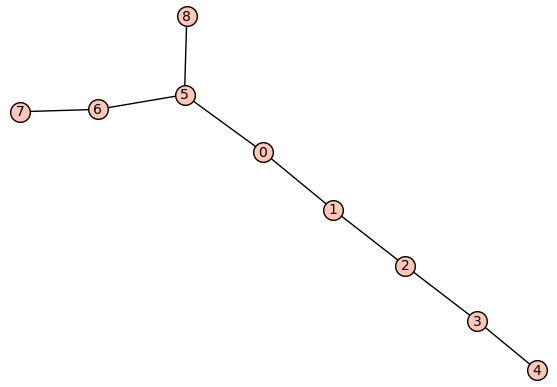

3
(1, -5, 2, 10, 1, -8, -10, 2, -5, 3, 12, 5, -4, 4, 9, -9, -8, -1, 0, -5, -3, 3, 8, 2, 0, -2, -1, 0, 0, 0)


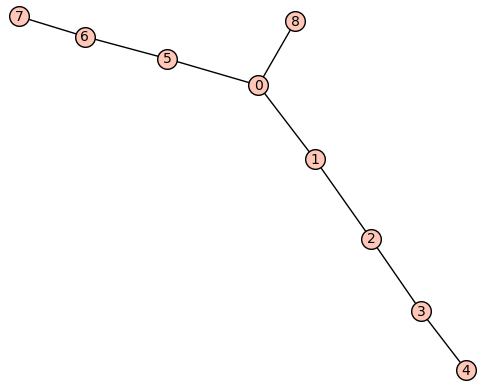

4
(1, -5, 2, 10, 2, -8, -10, 1, -7, 2, 12, 5, -2, 4, 9, -6, -8, -1, 1, -7, -3, 2, 7, 2, 0, -1, -1, 0, 0, 0)


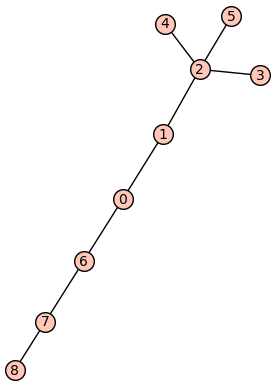

5
(1, -4, 1, 6, 1, -3, -4, 2, -3, 1, 3, 1, -3, 2, 3, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


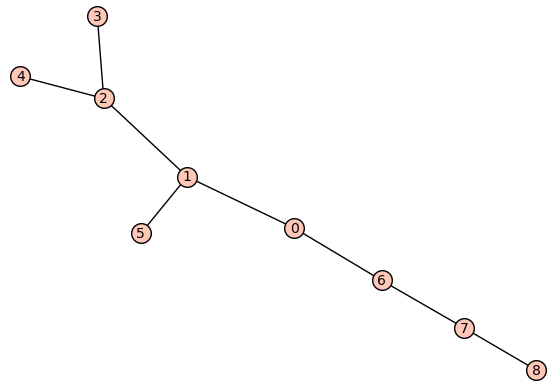

6
(1, -4, 1, 6, 2, -3, -4, 1, -6, 1, 3, 1, -1, 2, 5, -1, -1, 0, 1, -4, -1, 1, 1, 0, 0, 0, 0, 0, 0, 0)


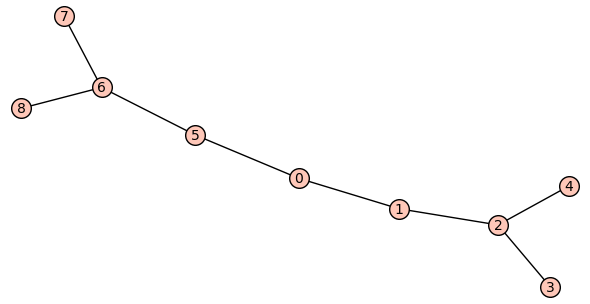

7
(1, -4, 0, 6, 2, 0, -4, 2, -6, 0, 0, 1, -3, 2, 6, 0, 0, 0, 1, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0)


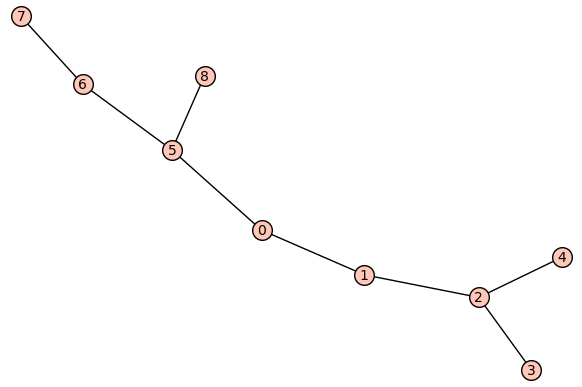

8
(1, -4, 1, 6, 1, -3, -4, 2, -4, 1, 3, 1, -3, 3, 5, -2, -1, 0, 0, -3, -1, 1, 1, 0, 0, 0, 0, 0, 0, 0)


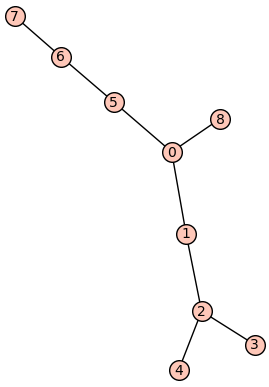

9
(1, -4, 1, 6, 2, -3, -4, 1, -5, 0, 3, 1, -2, 3, 5, -1, -1, 0, 1, -3, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0)


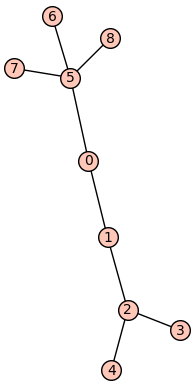

10
(1, -3, 0, 3, 1, 0, -1, 2, -2, 0, 0, 0, -2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


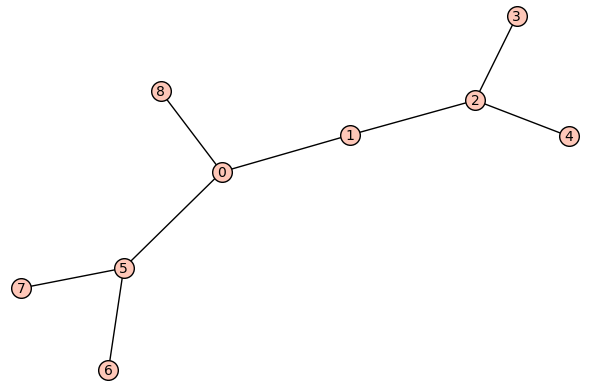

11
(1, -3, 0, 3, 2, 0, -1, 1, -4, 0, 0, 0, -1, 1, 2, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


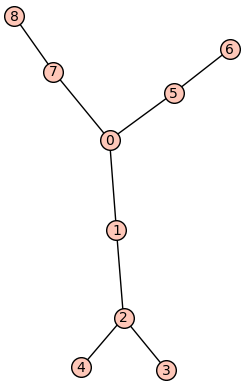

12
(1, -4, 2, 6, 1, -6, -4, 1, -3, 1, 6, 1, -2, 4, 4, -3, -2, 0, 0, -4, -1, 1, 2, 0, 0, 0, 0, 0, 0, 0)


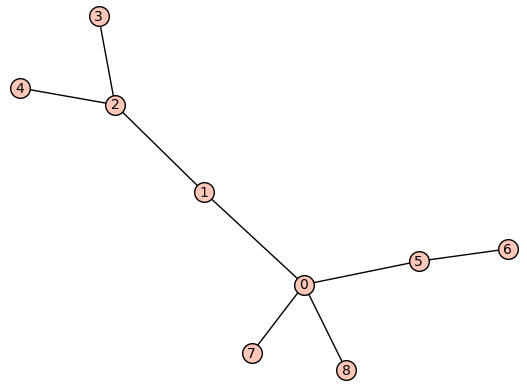

13
(1, -3, 1, 3, 1, -2, -1, 1, -2, 0, 1, 0, -1, 2, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


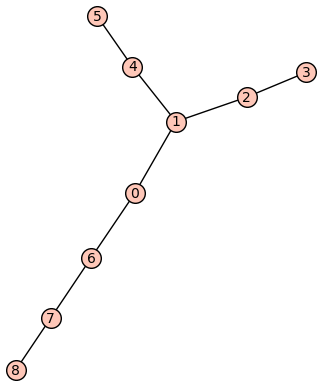

14
(1, -5, 3, 10, 1, -12, -10, 1, -4, 4, 18, 5, -2, 4, 6, -12, -12, -1, 0, -6, -2, 4, 12, 3, 0, -3, -2, 0, 0, 0)


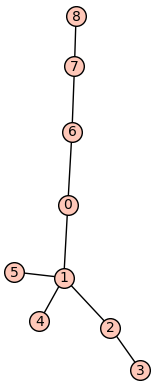

15
(1, -4, 2, 6, 1, -6, -4, 1, -3, 2, 6, 1, -1, 2, 2, -3, -2, 0, 0, -2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0)


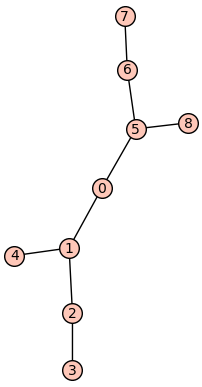

16
(1, -4, 2, 6, 0, -6, -4, 2, -2, 3, 6, 1, -3, 2, 4, -6, -2, 0, 0, -2, -1, 2, 3, 0, 0, -1, 0, 0, 0, 0)


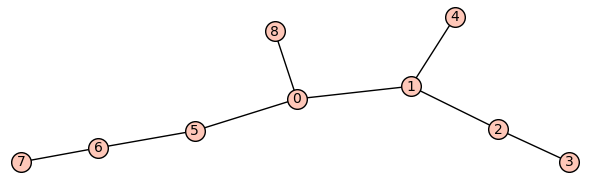

17
(1, -4, 2, 6, 1, -6, -4, 1, -3, 2, 6, 1, -2, 3, 4, -5, -2, 0, 0, -3, -1, 2, 3, 0, 0, -1, 0, 0, 0, 0)


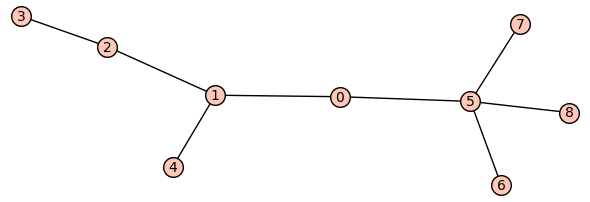

18
(1, -3, 1, 3, 0, -2, -1, 2, -1, 1, 1, 0, -2, 1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


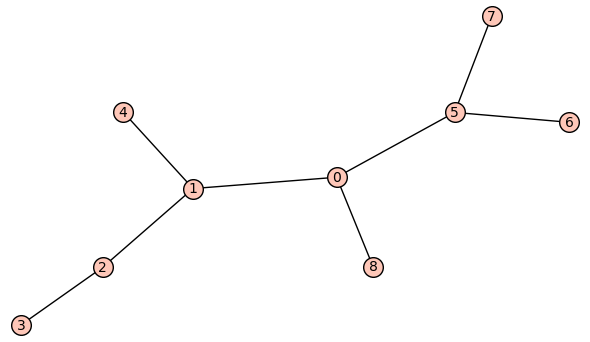

19
(1, -3, 1, 3, 1, -2, -1, 1, -3, 1, 1, 0, -1, 2, 2, -1, 0, 0, 0, -2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


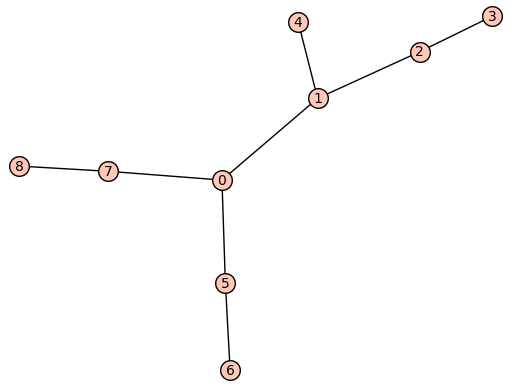

20
(1, -4, 3, 6, 0, -9, -4, 1, -1, 4, 9, 1, -2, 2, 3, -9, -3, 0, 0, -2, -1, 3, 5, 0, 0, -2, 0, 0, 0, 0)


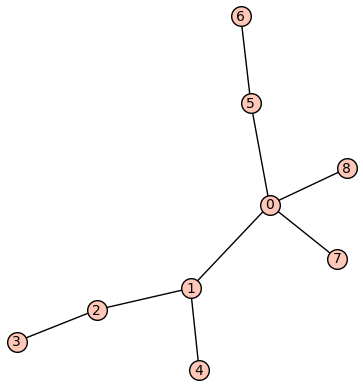

21
(1, -3, 2, 3, 0, -4, -1, 1, -1, 2, 2, 0, -1, 1, 1, -2, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


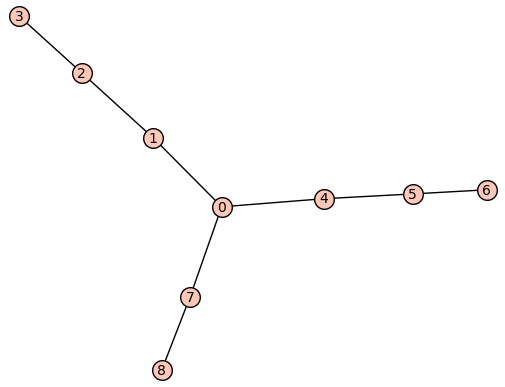

22
(1, -5, 3, 10, 2, -12, -10, 0, -6, 3, 18, 5, 0, 4, 6, -9, -12, -1, 1, -8, -2, 3, 11, 3, 0, -2, -2, 0, 0, 0)


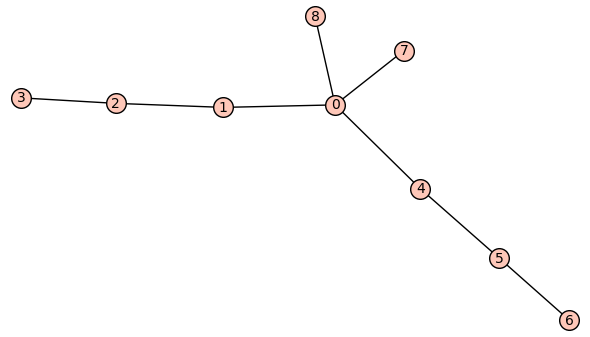

23
(1, -4, 2, 6, 2, -6, -4, 0, -4, 1, 6, 1, 0, 2, 2, -2, -2, 0, 1, -2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)


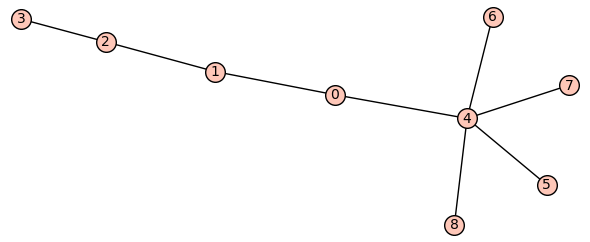

24
(1, -3, 1, 3, 1, -2, -1, 1, -2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


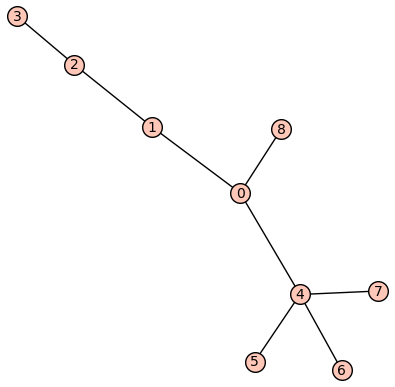

25
(1, -3, 1, 3, 1, -2, -1, 1, -1, 0, 1, 0, -2, 2, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


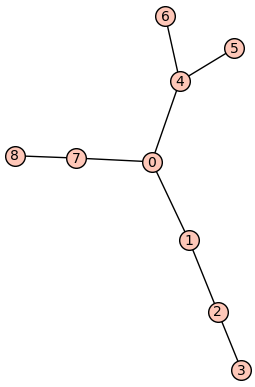

26
(1, -4, 2, 6, 2, -6, -4, 0, -5, 1, 6, 1, 0, 3, 4, -2, -2, 0, 1, -5, -1, 1, 2, 0, 0, 0, 0, 0, 0, 0)


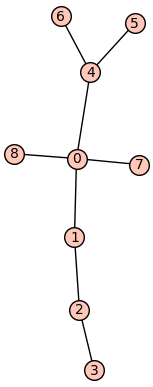

27
(1, -3, 1, 3, 2, -2, -1, 0, -3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


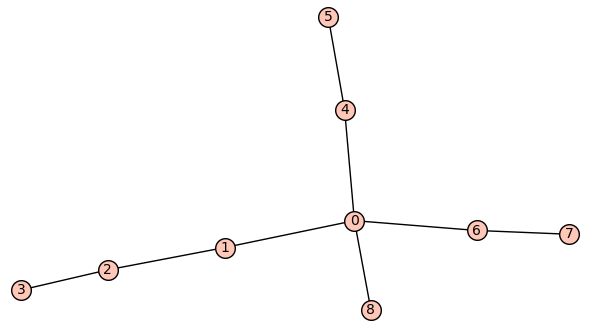

28
(1, -4, 3, 6, 1, -9, -4, 0, -2, 3, 9, 1, 0, 2, 1, -6, -3, 0, 0, -2, 0, 2, 3, 0, 0, -1, 0, 0, 0, 0)


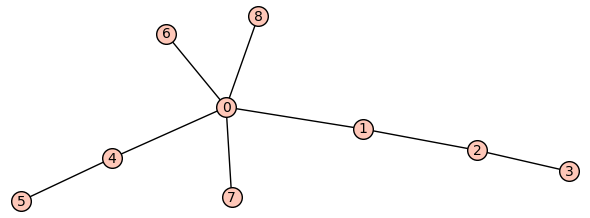

29
(1, -3, 2, 3, 1, -4, -1, 0, -1, 1, 2, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


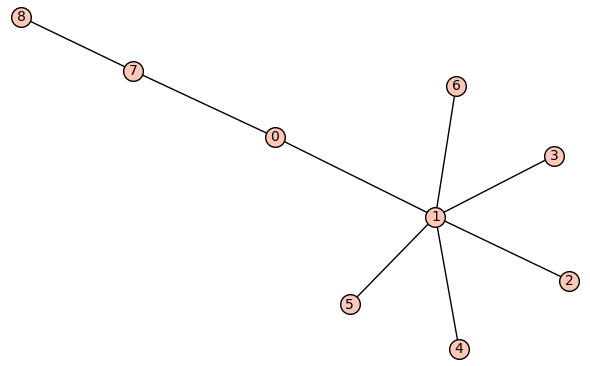

30
(1, -2, 1, 1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


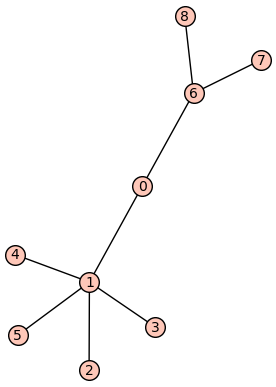

31
(1, -2, 0, 1, 1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


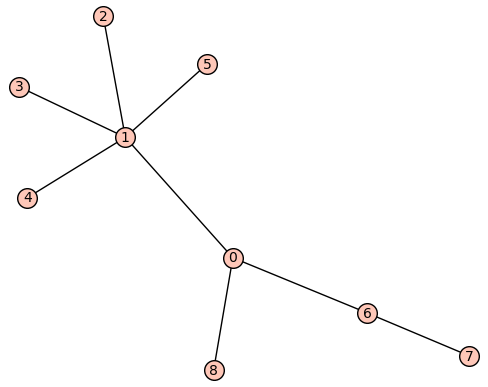

32
(1, -2, 1, 1, 0, -1, 0, 1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


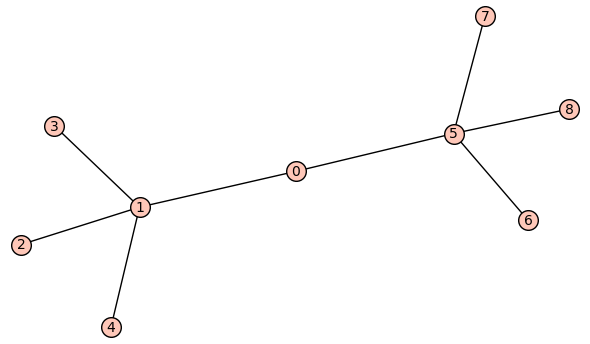

33
(1, -2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


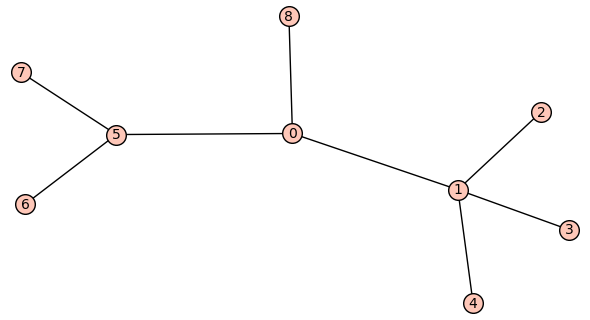

34
(1, -2, 0, 1, 1, 0, 0, 1, -1, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


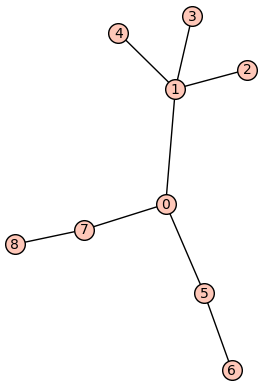

35
(1, -3, 2, 3, 0, -4, -1, 1, 0, 1, 2, 0, -2, 2, 1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


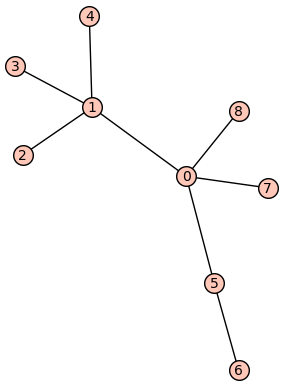

36
(1, -2, 1, 1, 0, -1, 0, 1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


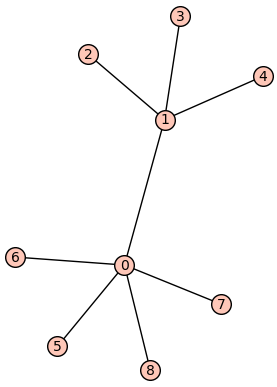

37
(1, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


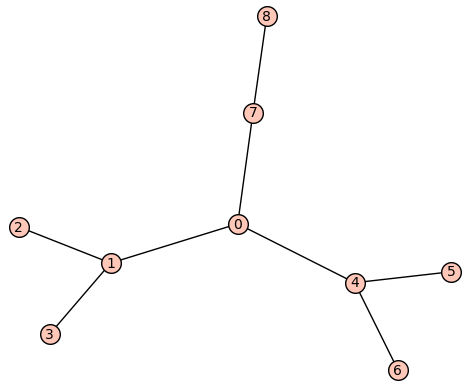

38
(1, -3, 1, 3, 2, -2, -1, 0, -4, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


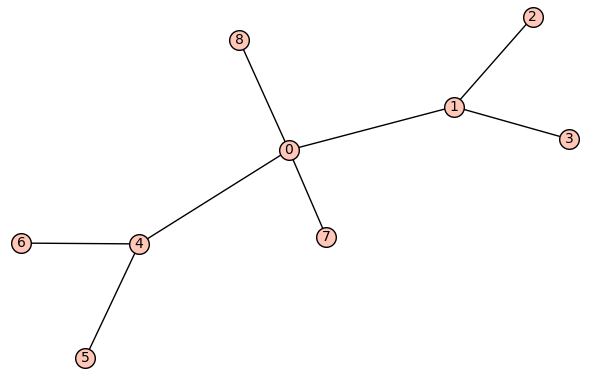

39
(1, -2, 0, 1, 2, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


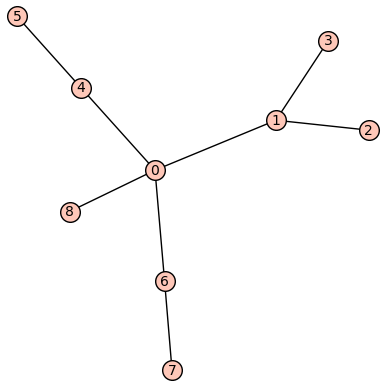

40
(1, -3, 2, 3, 1, -4, -1, 0, -2, 1, 2, 0, 0, 2, 1, -1, 0, 0, 0, -2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


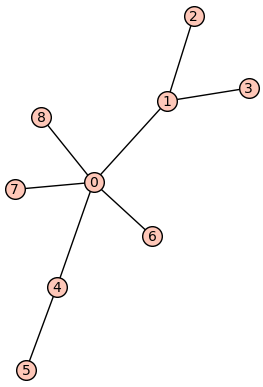

41
(1, -2, 1, 1, 1, -1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


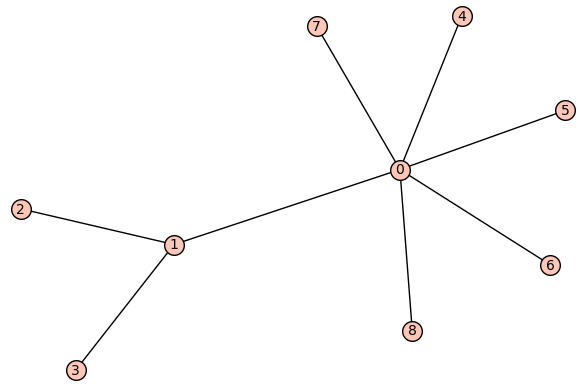

42
(1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


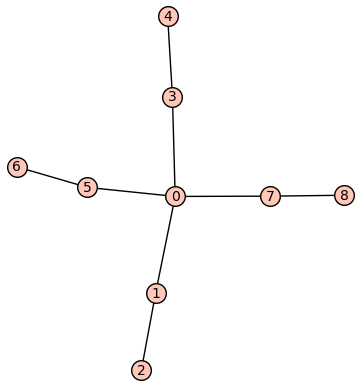

43
(1, -4, 4, 6, 0, -12, -4, 0, 0, 6, 12, 1, 0, 0, 0, -12, -4, 0, 0, 0, 0, 4, 6, 0, 0, -3, 0, 0, 0, 0)


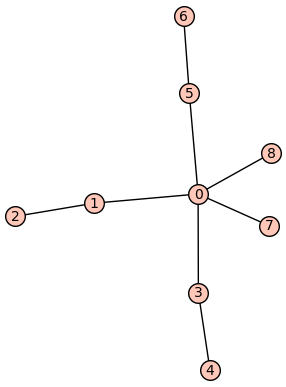

44
(1, -3, 3, 3, 0, -6, -1, 0, 0, 3, 3, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


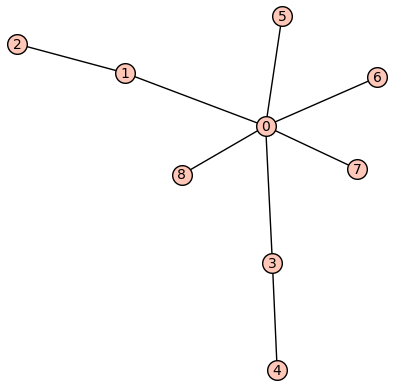

45
(1, -2, 2, 1, 0, -2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


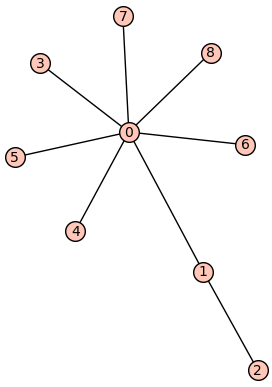

46
(1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


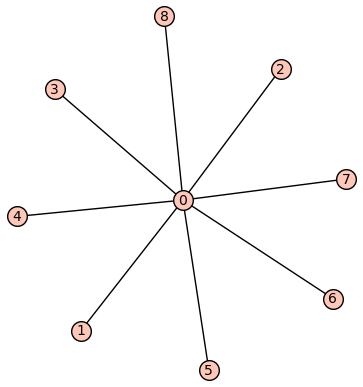

47
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [3]:
# Sage matrix implementation: restricted number of internal edges to at most 2

# Input: A forest F on n>=2 vertices, a list of forests seen so far
# Output: Returns the CSF of F as a vector of length p(n), in lexicographic order
def CSF_helper(F,n,seen_list):
    partitions = Partitions(n)
    # Base case: F has already been seen
    for seen_forest in seen_list:
        if seen_forest.is_isomorphic(F):
            return seen_list[seen_forest]

    CSF = zero_vector(ZZ, len(partitions))

    # Base case: F has no internal edges
    e = get_internal_edge(F)
    if e == None:
        p = F.connected_components_sizes()
        sign = (-1)**num_singletons(p)
        index = get_index(p,partitions)
        CSF[index] = sign
        seen_list[F.copy(immutable=True)] = CSF
        return CSF

    # Recursive case: F has not been seen and has an internal edge
    else: 
        F1 = F.copy()
        F2 = F.copy()
        F3 = F.copy()
        CSF = CSF_helper(left_operation(F1,e),n,seen_list) + CSF_helper(middle_operation(F2,e),n,seen_list) + CSF_helper(right_operation(F3,e),n,seen_list)
        seen_list[F.copy(immutable=True)] = CSF
        return CSF

# Input: n>=0
# Output: prints the CSF of all trees on n vertices
def CSF(n, int_edge_cap = None, print_bool = False, count = False):
    CSF_matrix = Matrix(0,len(Partitions(n)))
    seen_list = {}
    tree_iterator = graphs.trees(n)
    if print_bool or count:
        i = 0 #helps with plotting
    for tree in tree_iterator:
        if (int_edge_cap == None) or (num_int_edges(tree) <= int_edge_cap):
            if print_bool or count:
                i += 1
                if print_bool:
                    tree.plot().show()
                    print(i)
            tree = tree.copy()
            CSF = CSF_helper(tree, n, seen_list)
            print(CSF)
            CSF_matrix = CSF_matrix.stack(CSF)
    if count:
        print(i)
    return CSF_matrix

M = CSF(9,print_bool=True)
#print(M)
#print(rank(M))

#with open('data/csfdata1', 'w') as f:
    #with redirect_stdout(f):
        #print(M)